In [13]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [4]:
pip install scipy

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 330.3 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.8 kB 393.8 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.8 kB 440.4 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 324.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/44.5 MB 3.2 MB/s eta 0:00:14
   ---------------------------------------- 0.2/44.5 MB 2.9 MB/s eta 0:00:16
   ---------------------------------------- 0.3/44.5 MB 2.6 MB/s eta 0:00:17
    --------------------------------------- 0.7/44.5 MB 3.9 MB/s eta 0:00:12
    --------------------------------------- 0.7/44.5 MB 4.3 MB/s eta 0:00:11
   - -------------------------------------- 1.5/44.5 MB 6.3 MB/s eta 0:00:07
   -- ------------------------------------- 2.4/44.5 MB 7.7 MB/s eta 0:00:06


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Tarea 4
Luis Diego Dávila Calderón
Simulacion de Sistemas Fisicos 
Horario X 
  

1. Resolver la versión no lineal (x^3) del oscilador armónico, usando su propio código.
Establecemos la expresion Matematica de yb osilador armonico no lineal $$\ddot{x} + \delta \dot{x} + \alpha x + \beta x^3 =  F \cos(\omega t) $$

donde 𝛼  y β representan los términos lineales y cúbicos, respectivamente, 𝛿 es un coeficiente de amortiguamiento,



Para resolver este problema usaremos la libreria de scipy.integrate import odeint


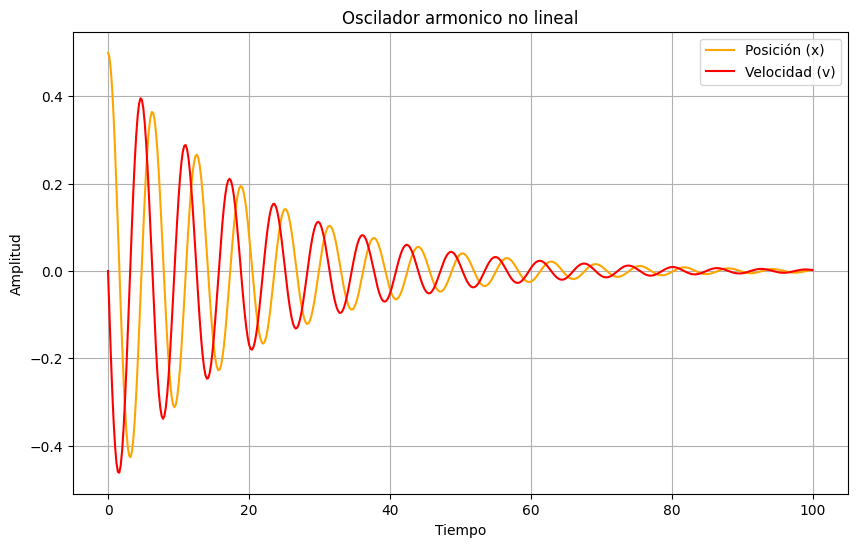

In [76]:
def oscilador(y,t,delta,alpha,beta,F,omega):
    x,v = y #Dos variables, posicion y velocidad
    dxdt = v #La derivada de x con t es la velocidad
    #Se obtiene de despejar de nuestra expresion original
    dvdt = -delta*v - alpha*x - beta*x**3 + F*np.cos(omega*t)
    #Regresan las dos derivadas 
    return [dxdt,dvdt]

#Establecemos valores iniciales 
y0 = [.5,0] #Corresponden a posicion y velocidad 
#Definimos el tiempo 
t = np.linspace(0,100,500)
#Coeficientes
delta =  0.1
alpha = 1
beta = .01 
F = 0      # Fuerza externa
omega = 0  # Frecuencia de la fuerza externa


# Usamos la función odeint para integrar el sistema de ecuaciones diferenciales
# Parámetros: función de la ecuación, condiciones iniciales, tiempo, y otros parámetros del sistema
solucion = odeint(oscilador, y0, t, args=(delta, alpha, beta, F, omega))

plt.figure(figsize=(10, 6))
plt.plot(t, solucion[:, 0], label='Posición (x)',c="orange")
plt.plot(t, solucion[:, 1], label='Velocidad (v)',c="red")
plt.legend(loc='best')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Oscilador armonico no lineal')
plt.grid(True)
plt.show()

#Gracias a este codigo podemos variar los parametros y estudiar el comportamiento 

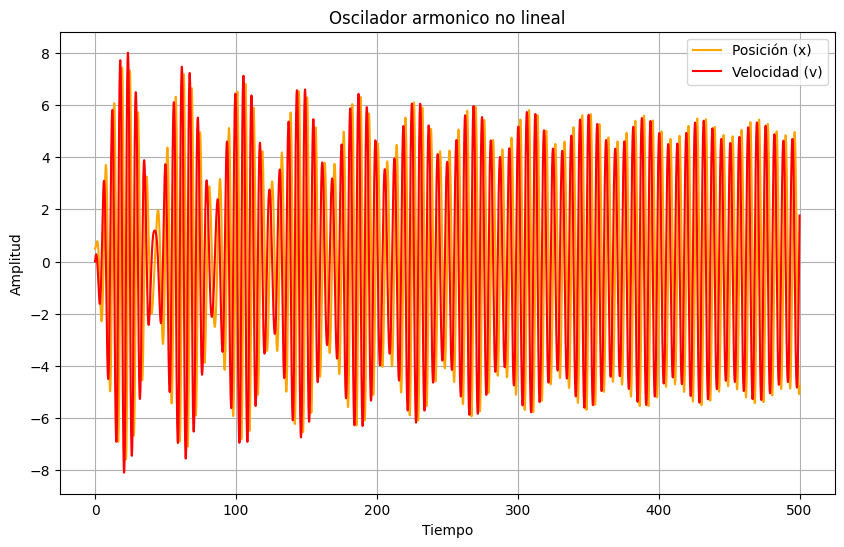

In [114]:
def oscilador(y,t,delta,alpha,beta,F,omega):
    x,v = y #Dos variables, posicion y velocidad
    dxdt = v #La derivada de x con t es la velocidad
    #Se obtiene de despejar de nuestra expresion original
    dvdt = -delta*v - alpha*x - beta*x**3 + F*np.cos(omega*t)
    #Regresan las dos derivadas 
    return [dxdt,dvdt]

#Establecemos valores iniciales 
y0 = [.5,0] #Corresponden a posicion y velocidad 
#Definimos el tiempo 
t = np.linspace(0,500,5000)
#Coeficientes
delta =  .01
alpha = 1
beta = .01
F = 1   # Fuerza externa
omega = 1  # Frecuencia de la fuerza externa


# Usamos la función odeint para integrar el sistema de ecuaciones diferenciales
# Parámetros: función de la ecuación, condiciones iniciales, tiempo, y otros parámetros del sistema
solucion = odeint(oscilador, y0, t, args=(delta, alpha, beta, F, omega))

plt.figure(figsize=(10, 6))
plt.plot(t, solucion[:, 0], label='Posición (x)',c="orange")
plt.plot(t, solucion[:, 1], label='Velocidad (v)',c="red")
plt.legend(loc='best')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Oscilador armonico no lineal')
plt.grid(True)
plt.show()

Podemos variar los valores de delta,alfa y beta, sin embargo lo interesante es dejar de igualar a cero y ver como se modifica la funcion al introducir una fuerza, en este caso vemos como cambia el perido, la frecuencia y la amplitud, vemos que tiene una convergencia mucho mas lenta y que es el caso que ni siquiera tenga una. 

2. Usando el programa, tomarán 10 valores de k, entre 0 (lo mas cercano) y 1. Posteriormente 10 valores de k, entre 1 y 25, y 10 valores de k, entre 30 y 200. Usarán 3 valores para el tamaño de la partición y 3 para para el número de segmentos. Pueden modificar el intervalo de tiempo de la solución si consideran que se pueden ver mejor los resultados.

Valores de k entre 0 y 1

n_steps = a menor disminuye la frecuencia 

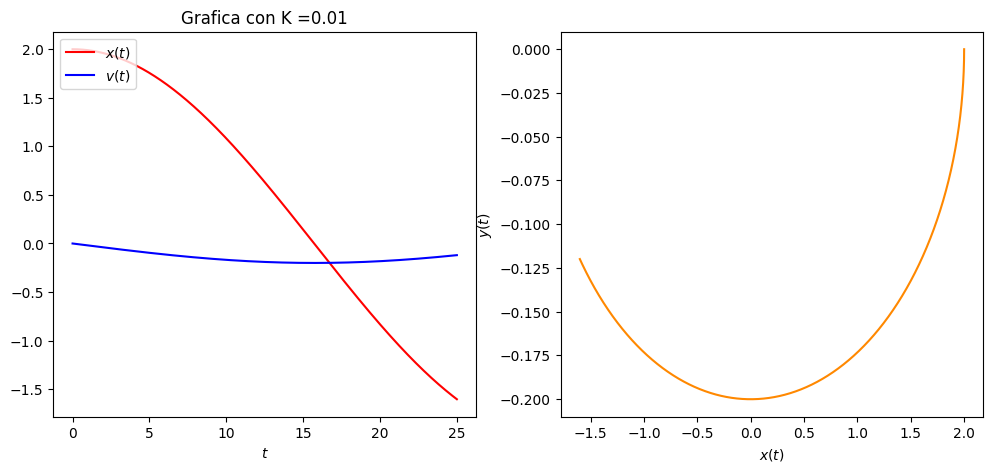

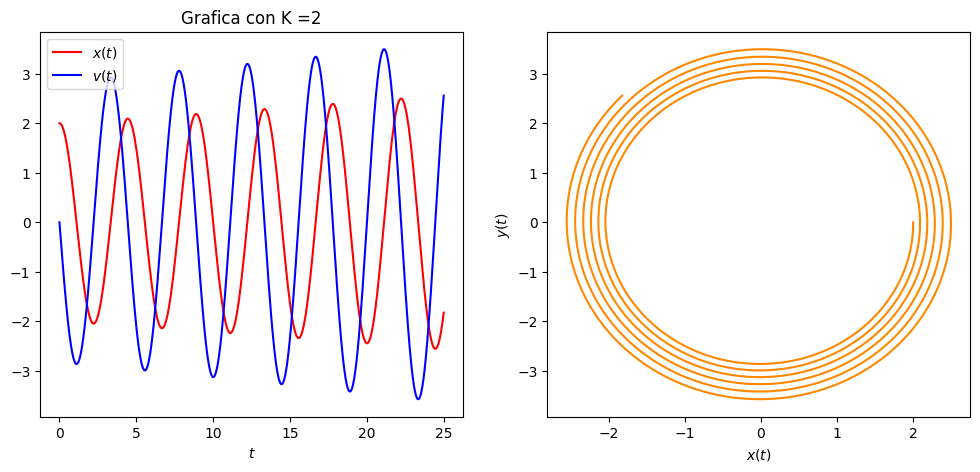

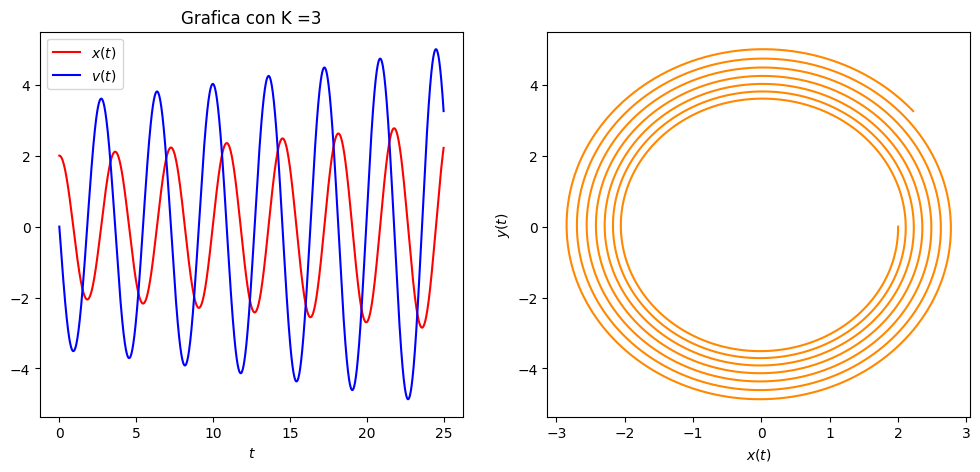

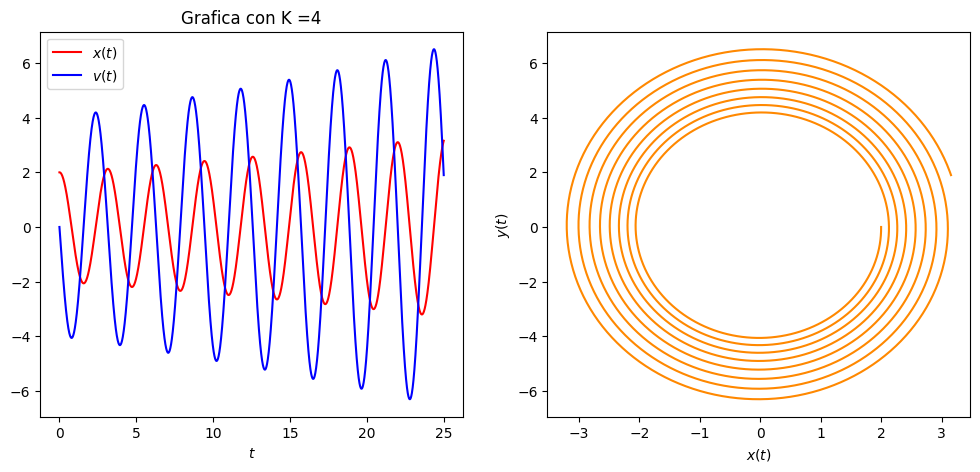

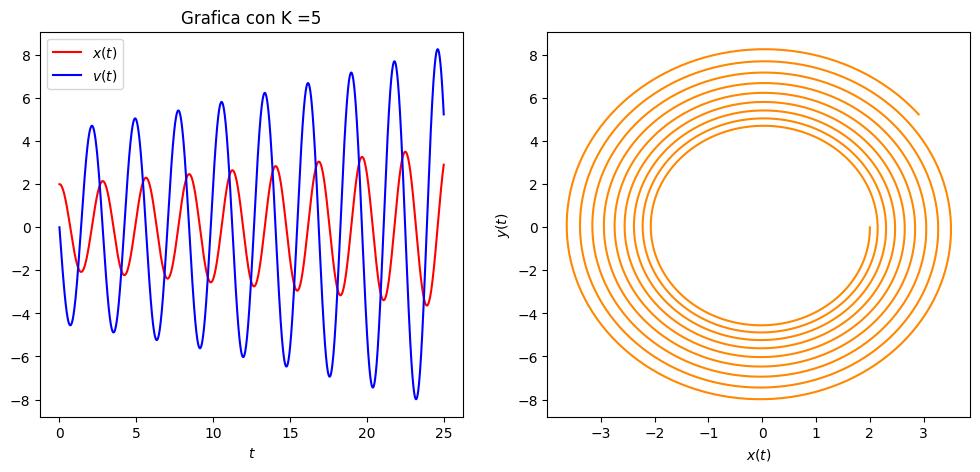

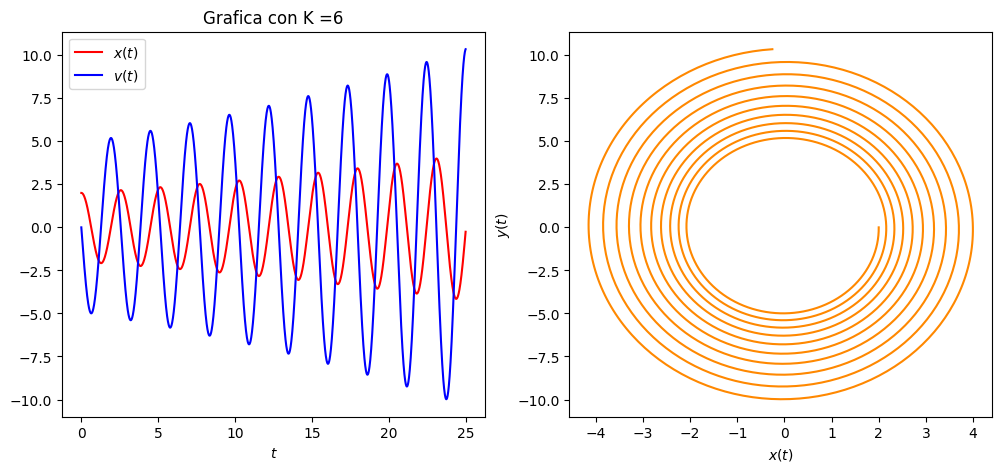

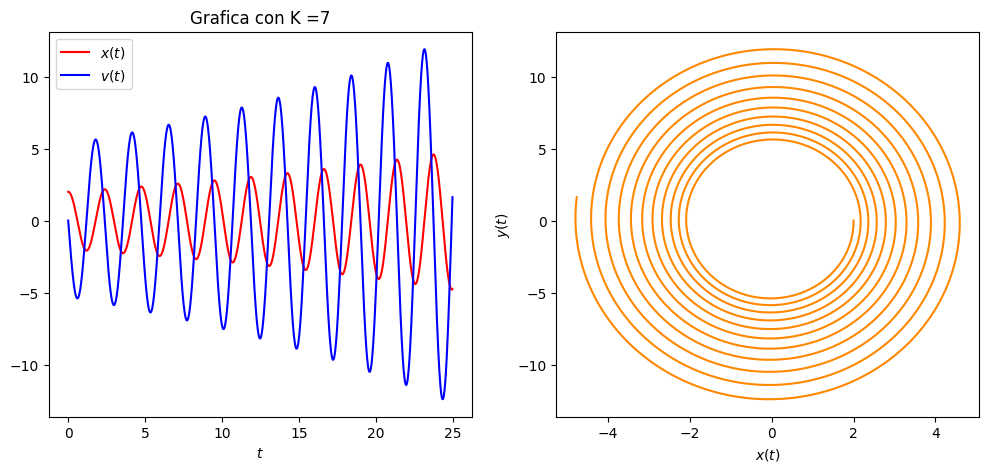

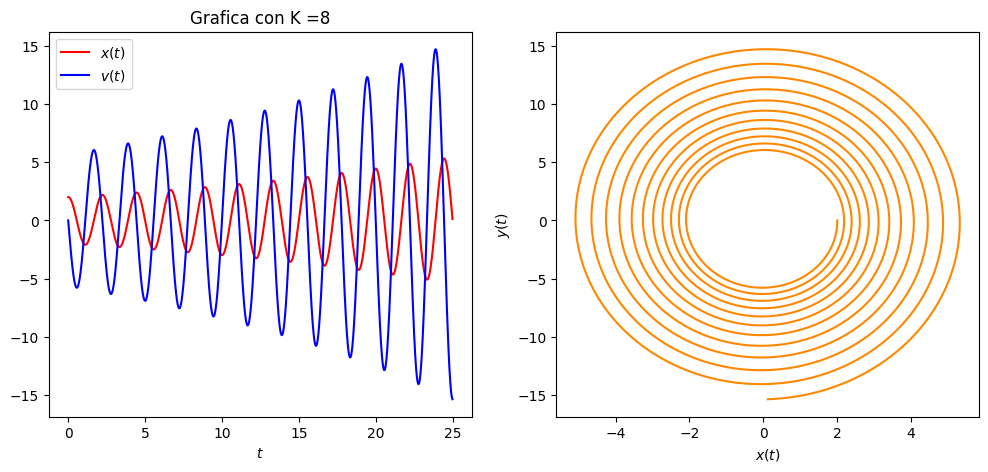

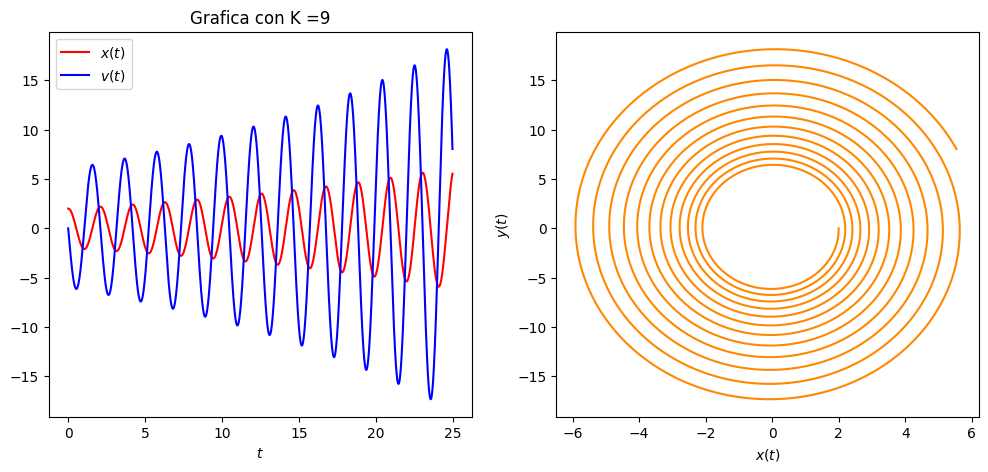

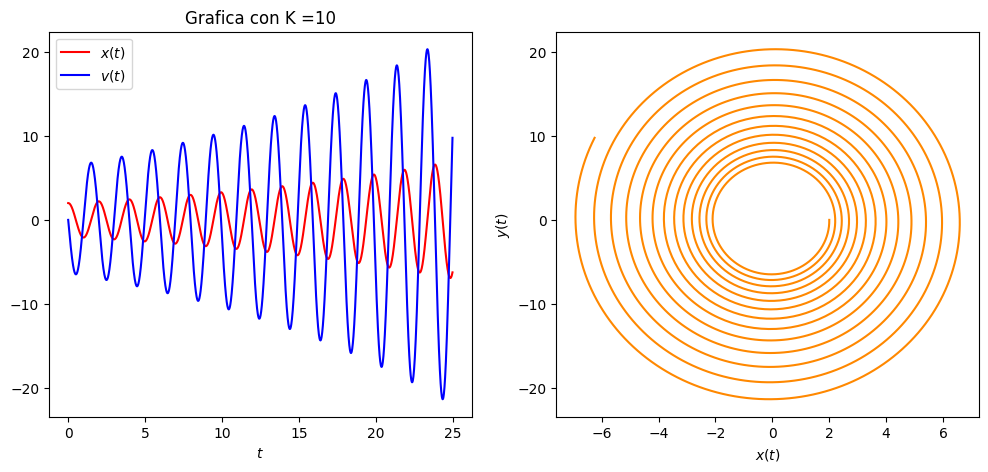

In [196]:
#Importamos todo el codigo 
%matplotlib inline                      
import numpy as np
import matplotlib.pyplot as plt

def harmonic_eq(x,t,k):
    # k = 0.5
    return x[1], - k*x[0]

def euler_2var(x, func, t, k, dt):
    y = func(x,t,k)
    return x[0] + dt*y[0], x[1]+ dt*y[1]

def calc_plot2var(method, equation, k, dt, n_steps):
    t = np.arange(0, n_steps*dt, dt) 
    x = np.zeros((n_steps,2))               # n_step
    x[0][0] = 2.0                           # initial position
    for i in range(n_steps-1):  
        x[i+1] = method(x[i],harmonic_eq, t[i], k, dt)
    
    fig = plt.figure(figsize=(12,5))
    axes = fig.add_subplot(1,2,1)
    axes.plot(t, x[:,0], 'r', label="$x(t)$")
    axes.plot(t, x[:,1], 'b', label="$v(t)$")
    plt.title(f"Grafica con K ={k}" )
    axes.set_xlabel("$t$")
    
    plt.legend(loc='upper left')
    
    #plot a trajectory
    axes = fig.add_subplot(1,2,2)
    axes.plot(x[:,0], x[:,1],'#ff8800')
    axes.set_xlabel("$x(t)$")
    axes.set_ylabel("$y(t)$")
    plt.show()

if __name__ == "__main__" :
    dt = .01
    n_steps = 2500
    calc_plot2var(euler_2var, harmonic_eq, .01, dt, n_steps)
    calc_plot2var(euler_2var, harmonic_eq, 2, dt, n_steps)
    calc_plot2var(euler_2var, harmonic_eq, 3, dt, n_steps)
    calc_plot2var(euler_2var, harmonic_eq, 4, dt, n_steps)
    calc_plot2var(euler_2var, harmonic_eq, 5, dt, n_steps)
    calc_plot2var(euler_2var, harmonic_eq, 6, dt, n_steps)
    calc_plot2var(euler_2var, harmonic_eq, 7, dt, n_steps)
    calc_plot2var(euler_2var, harmonic_eq, 8, dt, n_steps)
    calc_plot2var(euler_2var, harmonic_eq, 9, dt, n_steps)
    calc_plot2var(euler_2var, harmonic_eq, 10, dt, n_steps)

Ahora con valores de K que van de 01 a 25 
cambiando dt = .1
n_steps = 2500

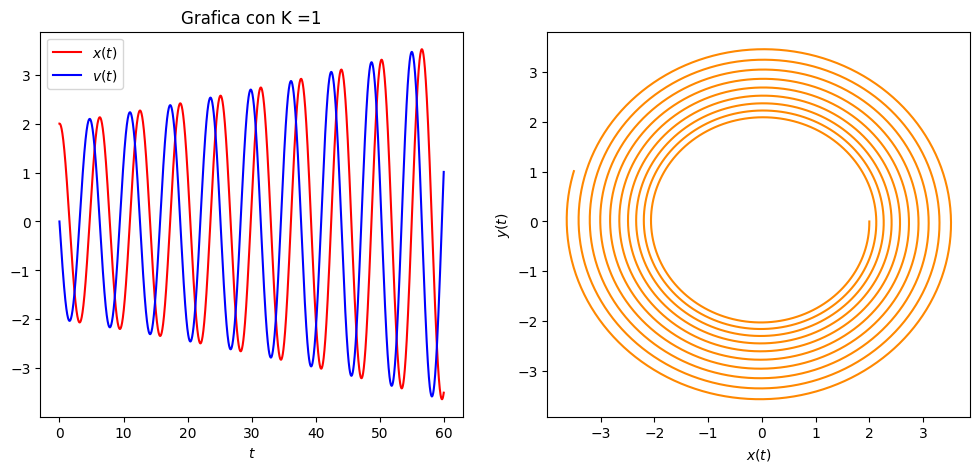

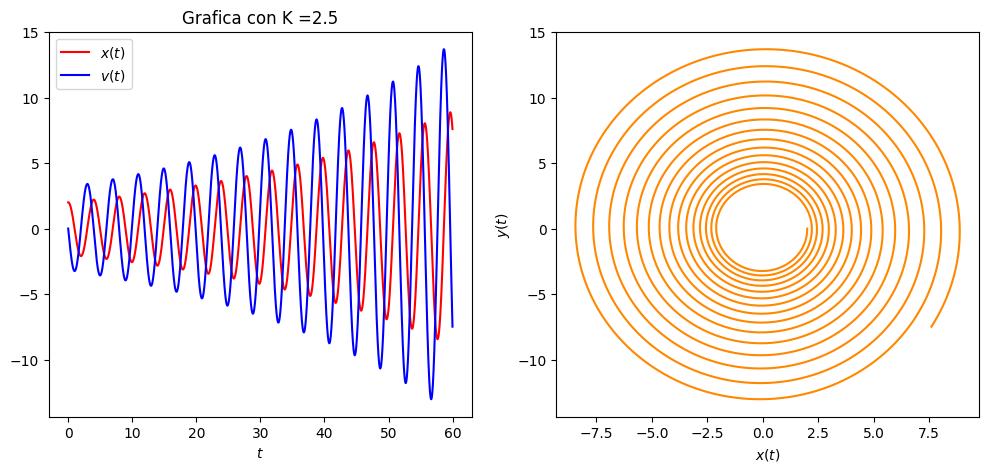

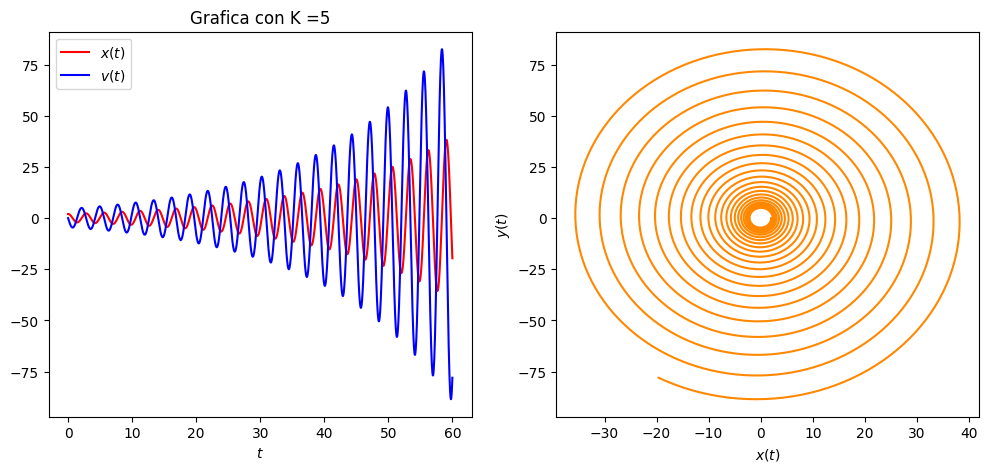

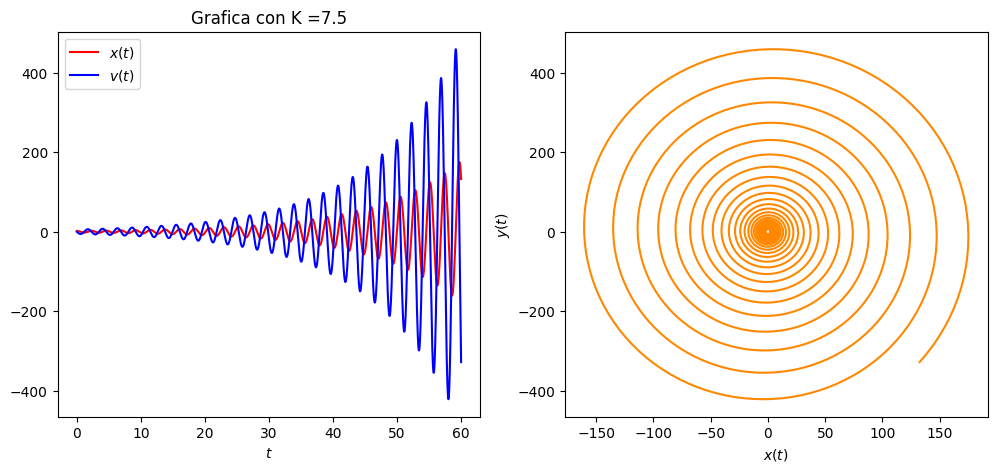

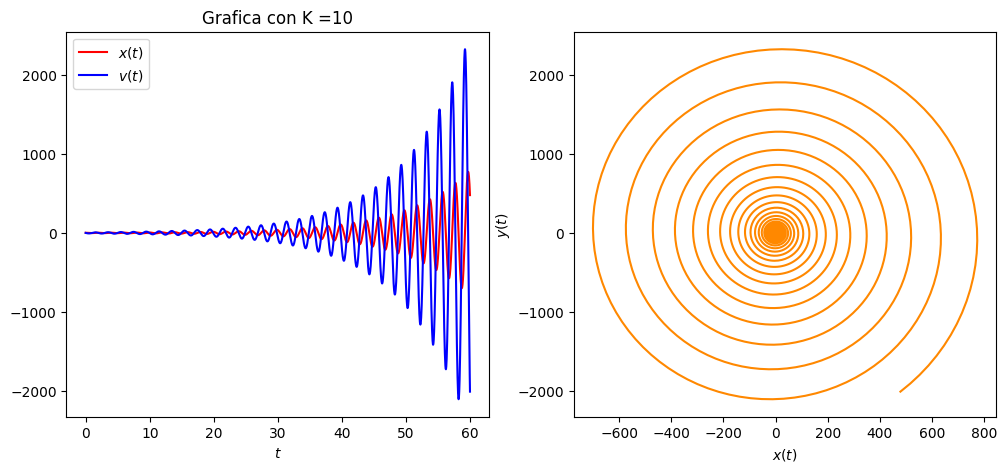

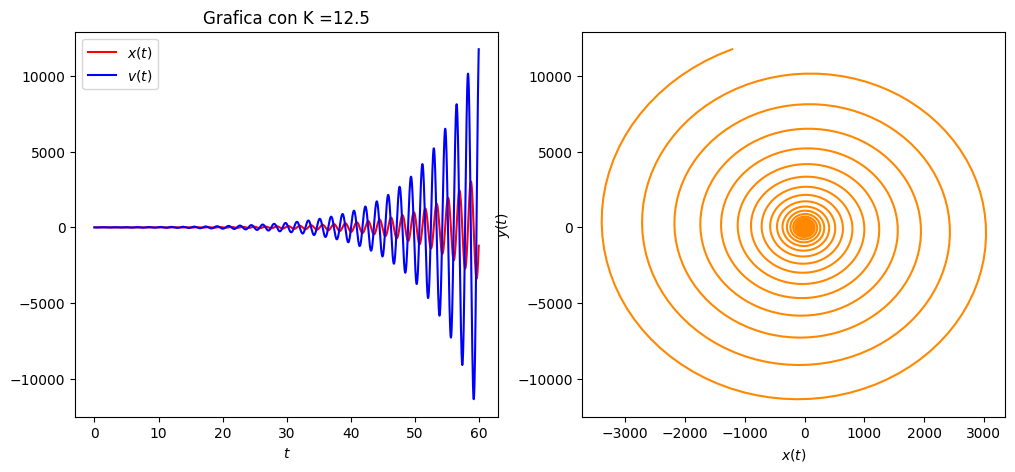

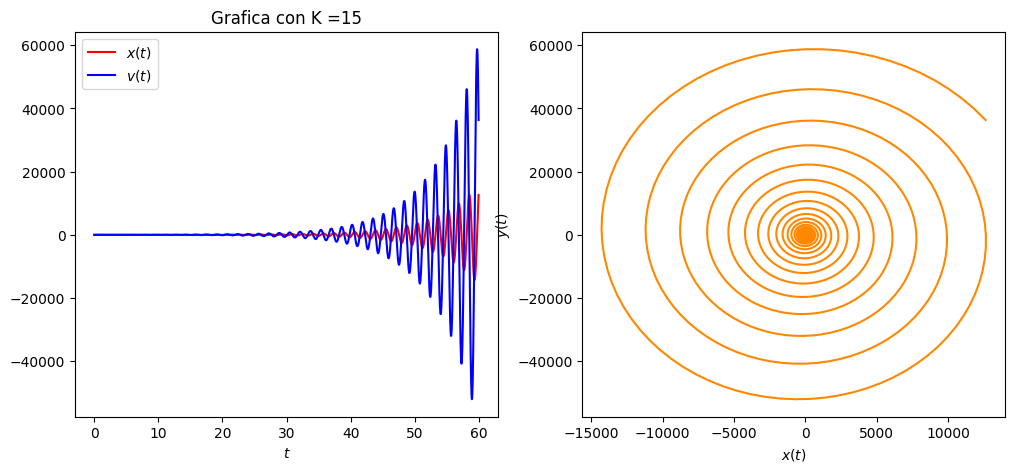

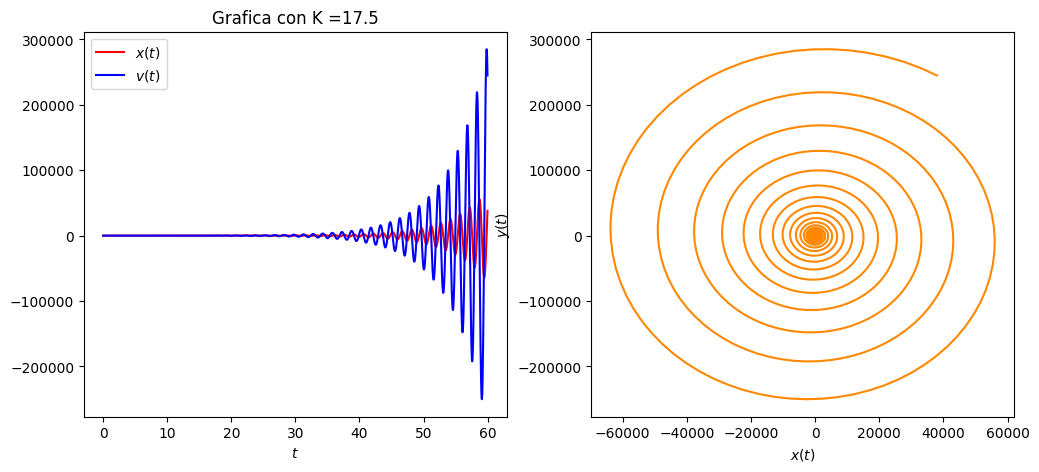

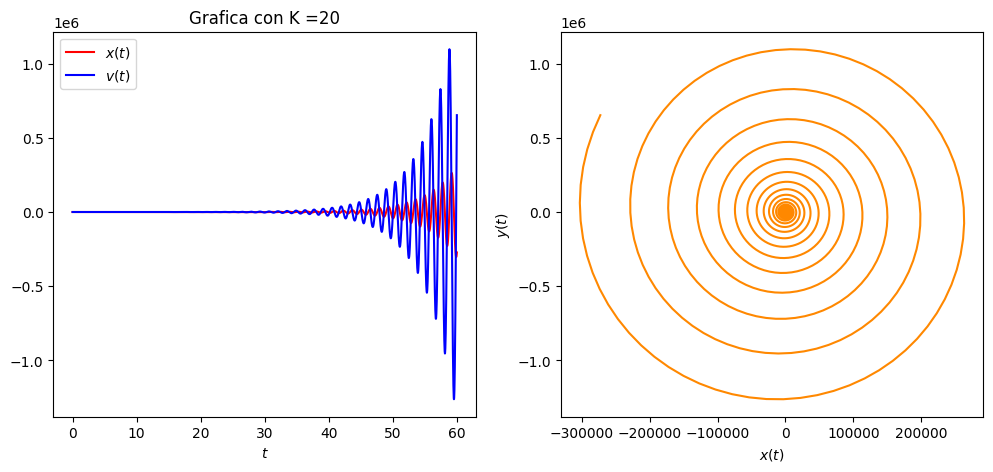

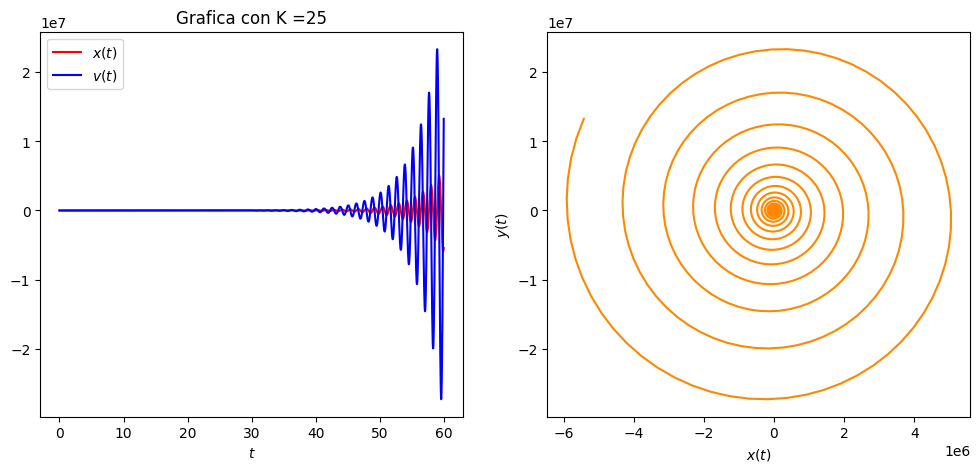

In [197]:
if __name__ == "__main__" :
    dt = .02
    n_steps = 3000
    calc_plot2var(euler_2var, harmonic_eq, 1, dt, n_steps)
    calc_plot2var(euler_2var, harmonic_eq, 2.5, dt, n_steps)
    calc_plot2var(euler_2var, harmonic_eq, 5, dt, n_steps)
    calc_plot2var(euler_2var, harmonic_eq, 7.5, dt, n_steps)
    calc_plot2var(euler_2var, harmonic_eq, 10, dt, n_steps)
    calc_plot2var(euler_2var, harmonic_eq, 12.5, dt, n_steps)
    calc_plot2var(euler_2var, harmonic_eq, 15, dt, n_steps)
    calc_plot2var(euler_2var, harmonic_eq, 17.5, dt, n_steps)
    calc_plot2var(euler_2var, harmonic_eq, 20, dt, n_steps)
    calc_plot2var(euler_2var, harmonic_eq, 25, dt, n_steps)

Ahora con valores de K que van de 30 a 200
cambiando dt = .1
n_steps = 5000

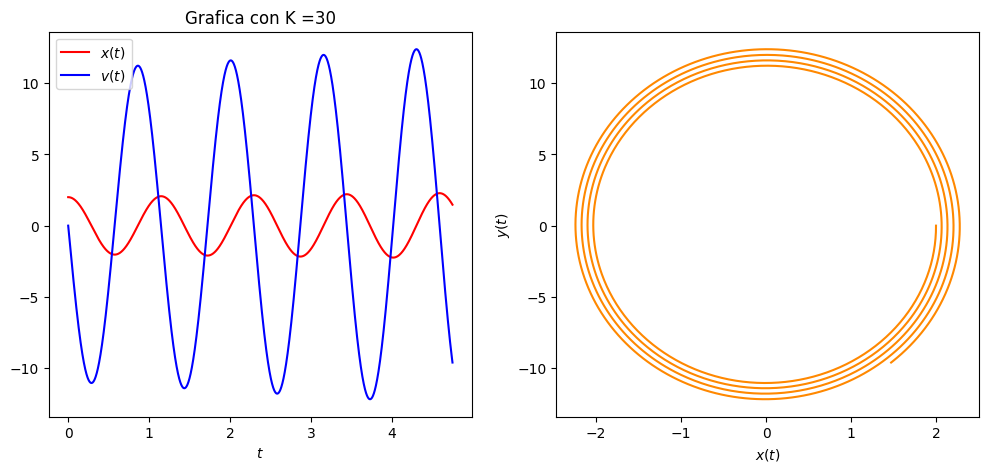

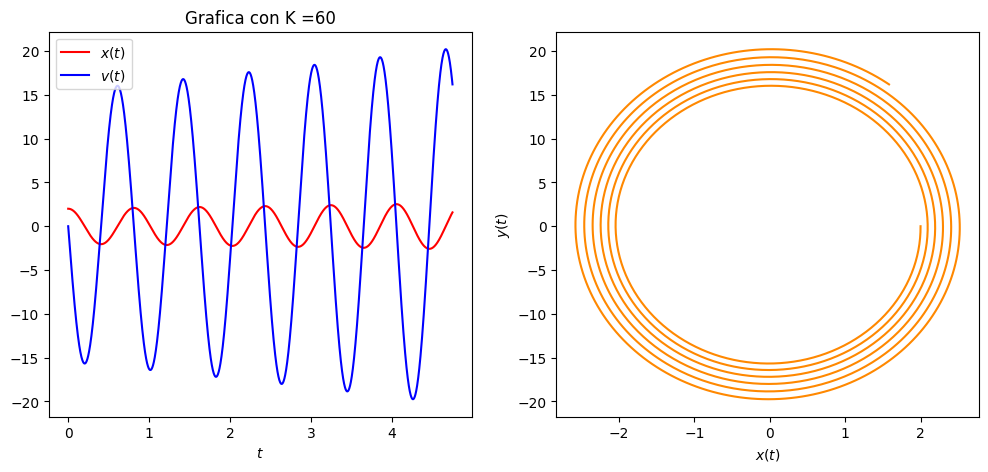

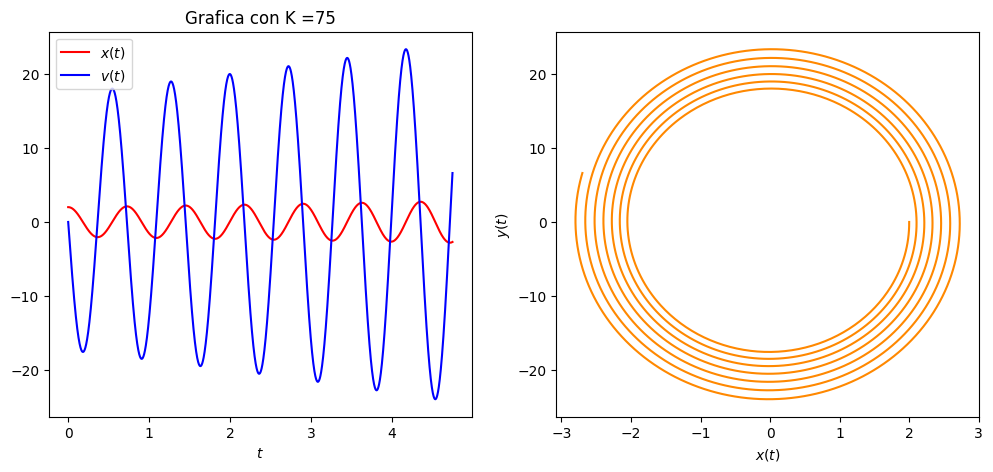

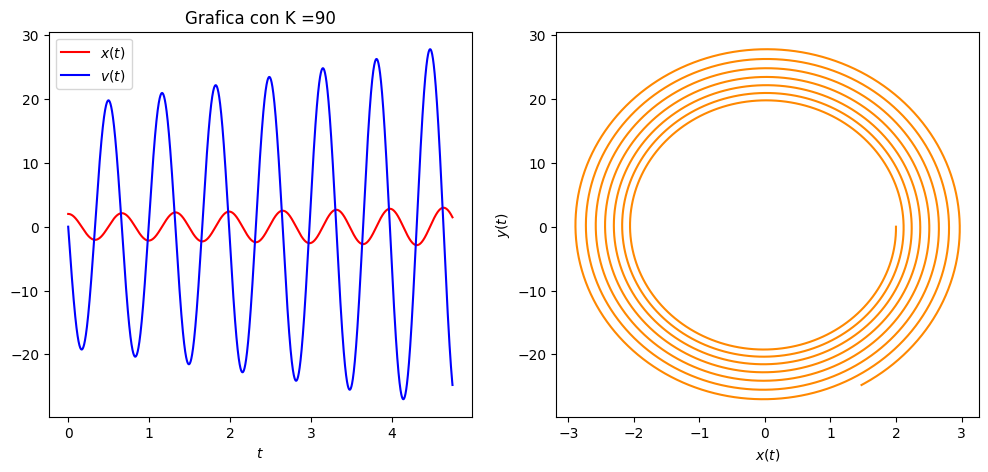

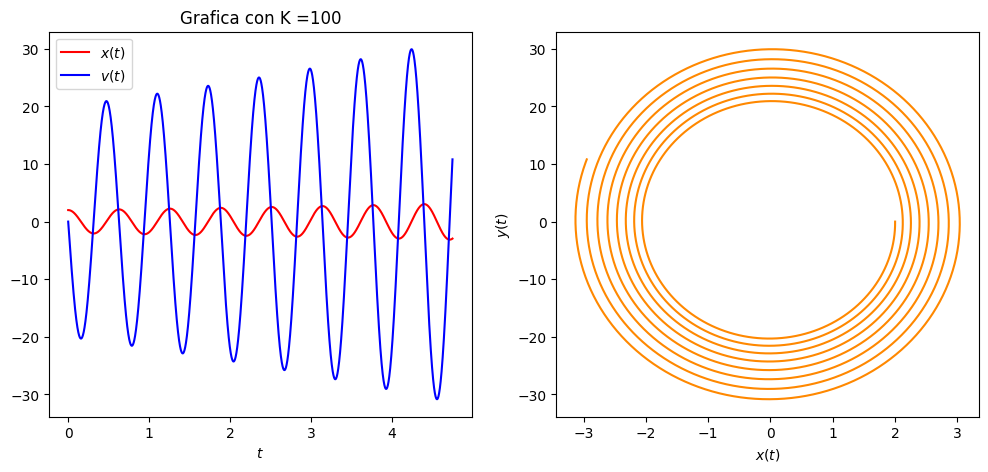

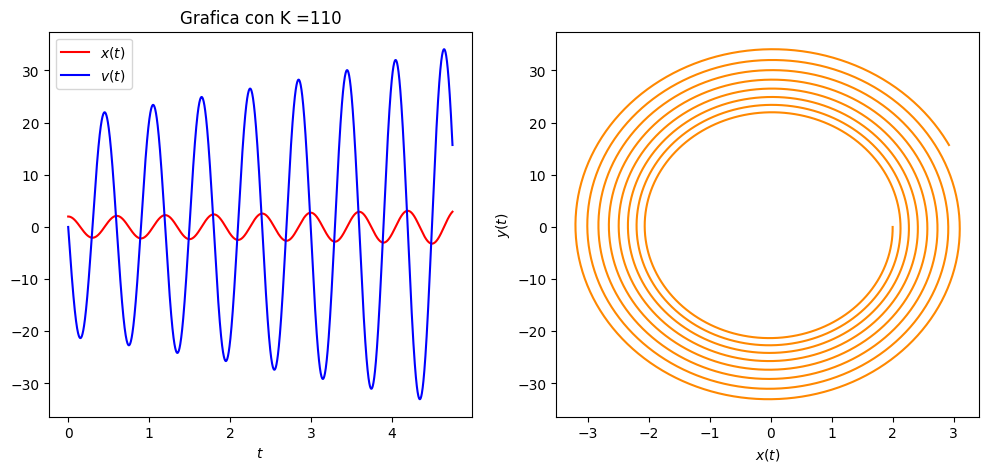

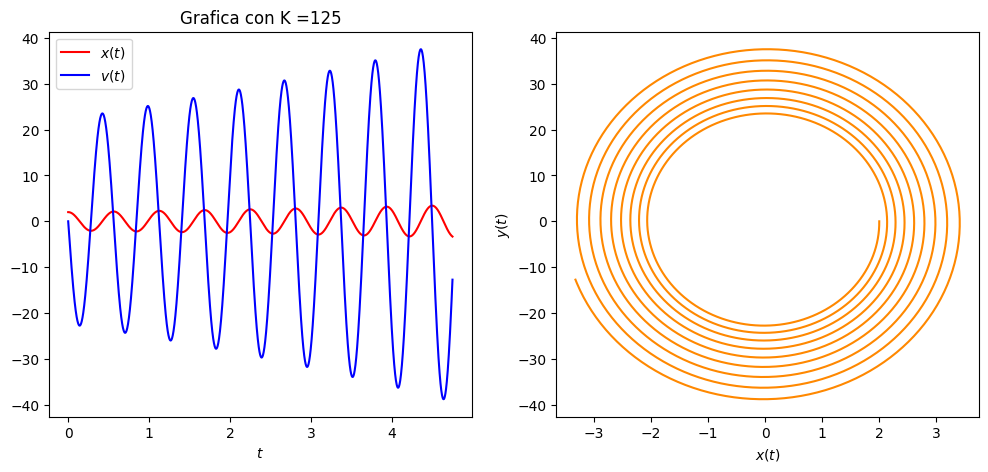

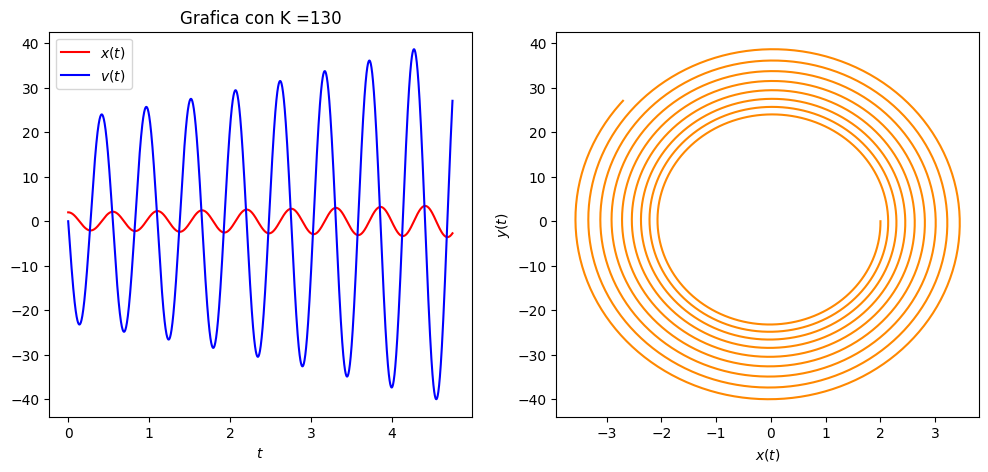

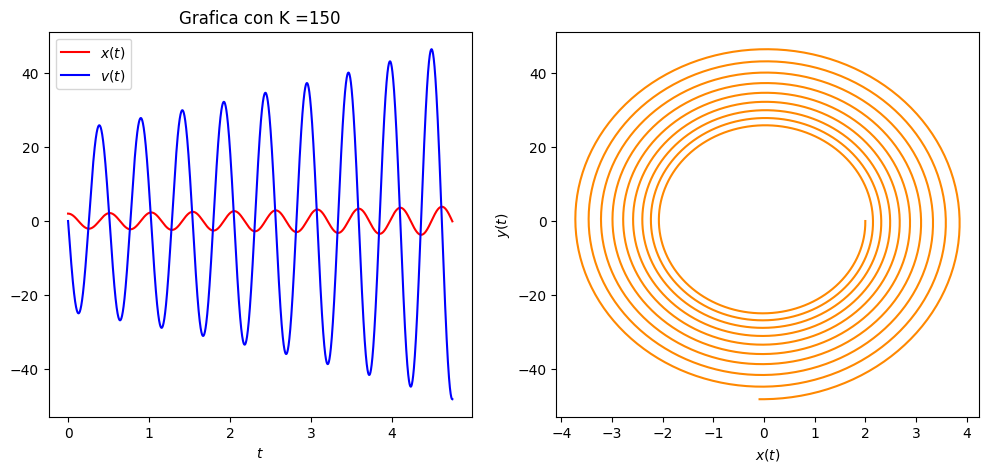

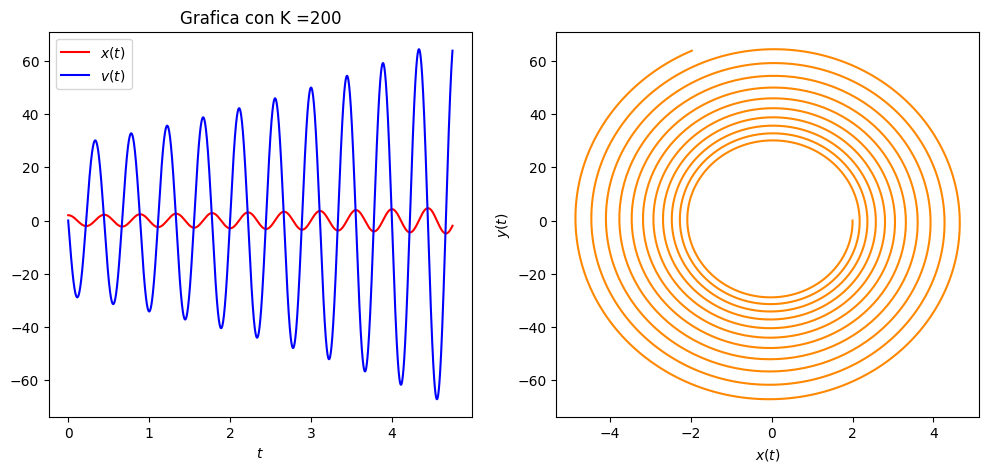

In [213]:
if __name__ == "__main__" :
    dt = .0019
    n_steps = 2500
    calc_plot2var(euler_2var, harmonic_eq, 30, dt, n_steps)
    calc_plot2var(euler_2var, harmonic_eq, 60, dt, n_steps)
    calc_plot2var(euler_2var, harmonic_eq, 75, dt, n_steps)
    calc_plot2var(euler_2var, harmonic_eq, 90, dt, n_steps)
    calc_plot2var(euler_2var, harmonic_eq, 100, dt, n_steps)
    calc_plot2var(euler_2var, harmonic_eq, 110, dt, n_steps)
    calc_plot2var(euler_2var, harmonic_eq, 125, dt, n_steps)
    calc_plot2var(euler_2var, harmonic_eq, 130, dt, n_steps)
    calc_plot2var(euler_2var, harmonic_eq, 150, dt, n_steps)
    calc_plot2var(euler_2var, harmonic_eq, 200, dt, n_steps)

En base a lo observado en estas 30 graficas podemos concluir que modificar el valor de n_steps nos permitia poder observar mas segmentos de la grafica, si aumentabamos al doble podiamos ver el doble de periodos,al variar el valor K podimos observar que se modificaba la frecuencia, existeiendo una relacion inversamente proporcional, si aumentaba K disminuia la fecuencia 